# Import the required libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

# Load the dataset

In [5]:
df = pd.read_csv(r"C:\Users\USER\Downloads\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis and Cleaning of the data

In [6]:
# view the shape of the dataset
df.shape

(891, 12)

In [7]:
# view the number of survivors
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# view the number of male and female
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [9]:
# port of embarkation
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# Check the list of columns with null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# view the full details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# correlation matrix of how the fields are related
df_corr_matrix = round(df.corr(), 3)
df_corr_matrix

C:\Users\USER\AppData\Local\Temp\ipykernel_6812\2234492770.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_matrix = round(df.corr(), 3)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000,-0.005,-0.035,0.037,-0.058,-0.002,0.013
Survived,-0.005,1.000,-0.338,-0.077,-0.035,0.082,0.257
Pclass,-0.035,-0.338,1.000,-0.369,0.083,0.018,-0.549
Age,0.037,-0.077,-0.369,1.000,-0.308,-0.189,0.096
SibSp,-0.058,-0.035,0.083,-0.308,1.000,0.415,0.160
Parch,-0.002,0.082,0.018,-0.189,0.415,1.000,0.216
Fare,0.013,0.257,-0.549,0.096,0.160,0.216,1.000


In [13]:
# drop the values that contribute less to our outcome
data = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# creating a function that will be used to fill in the missing values in age column using the Pclass
def age_func(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
# apply the function created earlier to the age column
data["Age"] = df[['Age', 'Pclass']].apply(age_func, axis=1)

In [16]:
# check if there's any null value 
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [18]:
# check the data types of our columns
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [19]:
men = data.loc[data.Sex == 'male']['Survived']

In [20]:
# rating the male that survived
rate_men = sum(men)/len(men)

In [21]:
rate_men

0.18890814558058924

In [22]:
men.tail()

883    0
884    0
886    0
889    1
890    0
Name: Survived, dtype: int64

In [23]:
data_dummied = pd.get_dummies(data, columns=["Sex", "Embarked"])

In [24]:
data_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
data_dummied.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

<AxesSubplot:>

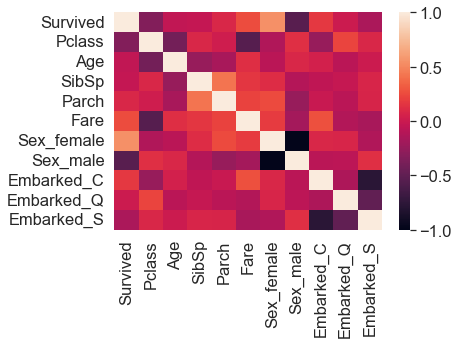

In [26]:
sns.heatmap(data_dummied.corr())

In [27]:
features = ["Pclass","Age","SibSp","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [28]:
# initializing x and y from our data
X = data_dummied[features].values
y = data_dummied["Survived"]

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=4)

In [30]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(623, 8)
(268, 8)
(623,)
(268,)


In [31]:
# define the model
LogReg = LogisticRegression(solver='liblinear', random_state=1)

In [32]:
# fitting the model
LogReg.fit(Xtrain, ytrain)

LogisticRegression(random_state=1, solver='liblinear')

In [33]:
# checking for the coefficient of all the features
LogReg.coef_

array([[-1.0483394 , -0.0306083 , -0.21197115,  2.15571869, -0.27121338,
         0.72091149,  0.51267133,  0.26206158]])

In [34]:
LogReg.intercept_

array([1.88450531])

In [35]:
LogReg.score(X,y)

0.7991021324354658

In [36]:
y_pred = LogReg.predict(X)

In [37]:
confusion_matrix(y, y_pred)

array([[469,  80],
       [ 99, 243]], dtype=int64)

# Report of the classification

In [38]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       549
           1       0.75      0.71      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [39]:
LogReg.predict_proba(Xtest)

array([[0.86427057, 0.13572943],
       [0.86782127, 0.13217873],
       [0.33776327, 0.66223673],
       [0.08579998, 0.91420002],
       [0.90129181, 0.09870819],
       [0.57578482, 0.42421518],
       [0.11691679, 0.88308321],
       [0.38667589, 0.61332411],
       [0.56835912, 0.43164088],
       [0.85971889, 0.14028111],
       [0.88124405, 0.11875595],
       [0.74574971, 0.25425029],
       [0.24861834, 0.75138166],
       [0.91681853, 0.08318147],
       [0.13607836, 0.86392164],
       [0.67063493, 0.32936507],
       [0.90190052, 0.09809948],
       [0.4915238 , 0.5084762 ],
       [0.85313419, 0.14686581],
       [0.12648307, 0.87351693],
       [0.81859749, 0.18140251],
       [0.84929265, 0.15070735],
       [0.8242504 , 0.1757496 ],
       [0.8242504 , 0.1757496 ],
       [0.22645668, 0.77354332],
       [0.4461002 , 0.5538998 ],
       [0.05761956, 0.94238044],
       [0.08562076, 0.91437924],
       [0.88124405, 0.11875595],
       [0.87468655, 0.12531345],
       [0.

# Predicting the Titanic dataset(test.csv)

In [40]:
test_set = pd.read_csv(r"C:\Users\USER\Documents\test.csv")

In [41]:
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
test_dummied = pd.get_dummies(test_set, columns=["Sex", "Embarked"])

In [43]:
test_dummied.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0,0,1


In [44]:
feat = ["Pclass","Age","SibSp","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]

In [45]:
X_test_set = test_dummied[feat].values

In [46]:
from sklearn.impute import SimpleImputer

# replace  missing values using descriptive statistic "most frequent(mode) along each column"
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# fit the imputer into the training and testing data
# X_train = imp.fit_transform(X_train)
X_test_set = imp.fit_transform(X_test_set)

In [47]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
classifier = xgb.XGBClassifier()

In [ ]:
classifier_fit = classifier.fit(Xtrain,ytrain)

In [ ]:
# lets make predictions from our test.csv
predict = classifier.predict(X_test_set)

In [ ]:
predict

In [ ]:
Kaggle = pd.DataFrame({'Passengers':test_dummied['PassengerId'], 'Survived':predict})

In [ ]:
Kaggle.head()

In [ ]:
accuracy = classifier.score(X_test_set, predict)

In [ ]:
accuracy

In [ ]:
# change to csv file
submission_file = Kaggle.to_csv('kaggle.csv', index=False)